In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:
sns.color_palette(cccpalette)

In [27]:
import os
os.listdir()

['.git',
 '.gitattributes',
 '.gitignore',
 '.ipynb_checkpoints',
 'calc_csat.py',
 'cluster_assignment.csv.gz',
 'doc',
 'master model notebook.ipynb',
 'model_equations.py',
 'model_equations_no_quota.py',
 'model_equations_separate_NC.py',
 'model_equations_separate_NC_sep_vmax.py',
 'model_NC_analyze_clusters.ipynb',
 'model_NC_cc.ipynb',
 'model_NC_cc_mechanisms.ipynb',
 'model_NC_cc_optimize.ipynb',
 'model_NC_honly.ipynb',
 'model_NC_lookup before signal resp.ipynb',
 'model_NC_lookup.ipynb',
 'model_NC_ponly.ipynb',
 'model_NC_salib.ipynb',
 'model_noquota_cc.ipynb',
 'model_noquota_honly.ipynb',
 'model_noquota_ponly.ipynb',
 'Model_Parameters.xlsx',
 'model_param_sensitivity.ipynb',
 'model_param_sensitivity_ponly.ipynb',
 'model_quota_cc.ipynb',
 'model_quota_honly.ipynb',
 'model_quota_ponly.ipynb',
 'param_values_log.txt.gz',
 'prelim_bottle.csv',
 'prepare_data',
 'README.md',
 'refence_pro99_axenic.xlsx',
 'reference_10cc.xlsx',
 'reference_10cc_axenic.xlsx',
 'results_p

In [28]:
refdf = pd.read_excel('refence_pro99_axenic.xlsx',)


In [7]:
print_params()

Mh  = 1.16e-06, 1.00e-01
Mp  = 1.16e-06, 1.00e-01
gammaDp  = 6.00e-01, 5.18e+04
gammaDh  = 6.00e-01, 5.18e+04
Rp  = 7.00e+00, 6.05e+05
Rh  = 4.50e+00, 3.89e+05
EOp  = 1.16e-06, 1.00e-01
EIp  = 0.00e+00, 0.00e+00
EOh  = 1.16e-06, 1.00e-01
EIh  = 0.00e+00, 0.00e+00
KONp  = 1.43e-01, 1.23e+04
KINp  = 1.43e-01, 1.23e+04
KOCp  = 1.43e-01, 1.23e+04
KICp  = 1.43e-01, 1.23e+04
KONh  = 2.50e-01, 2.16e+04
KINh  = 2.50e-01, 2.16e+04
KOCh  = 2.50e-01, 2.16e+04
KICh  = 2.50e-01, 2.16e+04
VmaxONp  = 1.64e-05, 1.42e+00
VmaxINp  = 8.20e-05, 7.08e+00
VmaxOCp  = 1.28e-05, 1.11e+00
VmaxICp  = 6.40e-05, 5.53e+00
VmaxONh  = 1.50e-05, 1.30e+00
VmaxINh  = 1.50e-05, 1.30e+00
VmaxOCh  = 6.77e-05, 5.85e+00
VmaxICh  = 0.00e+00, 0.00e+00
Oh  = 1.00e+00, 8.64e+04
Op  = 1.00e+00, 8.64e+04
E_ROSp  = 6.48e-07, 5.60e-02
E_ROSh  = 4.05e-07, 3.50e-02
VmaxROSh  = 7.70e-06, 6.65e-01
K_ROSh  = 2.50e-01, 2.16e+04
omegaP  = 1.00e-02, 8.64e+02
omegaH  = 1.00e-05, 8.64e-01
ROS_decay  = 1.16e-07, 1.00e-02
KABp  = 1.43e-01, 1.23

In [8]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [9]:
param_vals = get_param_vals('MIN')

In [11]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_ponly_data(param_vals, pro99_mode=True)

In [12]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = 1.04e-05, init Bp = 1.79e+00, newval = 1.79e+00
dDON/dt = 1.24e-06, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 8.27e-07, init RDON = 0.00e+00, newval = 8.27e-07
dDIN/dt = -1.24e-05, init DIN = 8.00e+02, newval = 8.00e+02
dDOC/dt = 8.68e-06, init DOC = 1.32e+02, newval = 1.33e+02
dRDOC/dt = 5.79e-06, init RDOC = 0.00e+00, newval = 5.79e-06
dDIC/dt = -8.71e-05, init DIC = 2.24e+03, newval = 2.24e+03
dROS/dt = -2.31e-08, init ROS = 2.00e-01, newval = 2.00e-01
dABp/dt = 0.00e+00, init ABp = 0.00e+00, newval = 0.00e+00
dABh/dt = 0.00e+00, init ABh = 0.00e+00, newval = 0.00e+00


In [13]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xp   = 1.00e+09
limINp = 1.00e+00
limONp = 9.93e-01
limICp = 1.00e+00
limOCp = 9.99e-01
gross_uptakeINp = 1.46e-04
gross_uptakeONp = 0.00e+00
gross_uptakeICp = 1.14e-04
gross_uptakeOCp = 0.00e+00
net_uptakeNp = 1.63e-05
overflowNp = 1.30e-04
overflowCp = 1.36e-20
deathp = 2.07e-06
leakinessOp = 0.00e+00
leakinessIp = 0.00e+00
ROSreleasep = 0.00e+00
respirationp = 3.88e-06
dic_air_water_exchange = -9.11e-18


In [14]:
biomass_diff0_ponly(calc_dydt, var_names,init_vars)


dBp/dt  + dDON/dt + dRDON/dt + dDIN/dt = -3.3881317890172014e-21


In [15]:
var_names

['Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 'ABp', 'ABh']

In [16]:
init_vars

In [17]:
#sol = run_solver(calc_dydt, init_vars)
sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))

simulation time 6.90625


In [18]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func, param_vals)

In [19]:
df.head()

,Bp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,ABp,ABh,...,overflowCp,deathp,leakinessOp,leakinessIp,ROSreleasep,respirationp,dic_air_water_exchange,Bp[C],ABp[C],ABh[C]
0,1.785714,20.000000,0.000000,800.000000,132.500000,0.000000,2241.552301,0.200000,0.0,0.0,...,1.355253e-20,0.000002,0.0,0.0,0.0,0.000004,-9.107298e-18,12.500000,0.0,0.0
1,1.941545,20.018625,0.012417,799.813127,132.630378,0.086919,2240.255430,0.199667,0.0,0.0,...,2.710505e-20,0.000002,0.0,0.0,0.0,0.000004,1.578800e-06,13.590816,0.0,0.0
2,2.110975,20.038876,0.025917,799.609946,132.772134,0.181422,2238.867923,0.199334,0.0,0.0,...,2.710505e-20,0.000002,0.0,0.0,0.0,0.000005,3.267939e-06,14.776822,0.0,0.0
3,2.295189,20.060894,0.040596,799.389035,132.926259,0.284173,2237.381480,0.199002,0.0,0.0,...,2.710505e-20,0.000003,0.0,0.0,0.0,0.000005,5.077522e-06,16.066325,0.0,0.0
4,2.495479,20.084834,0.056556,799.148846,133.093835,0.395890,2235.787082,0.198671,0.0,0.0,...,2.710505e-20,0.000003,0.0,0.0,0.0,0.000005,7.018527e-06,17.468356,0.0,0.0


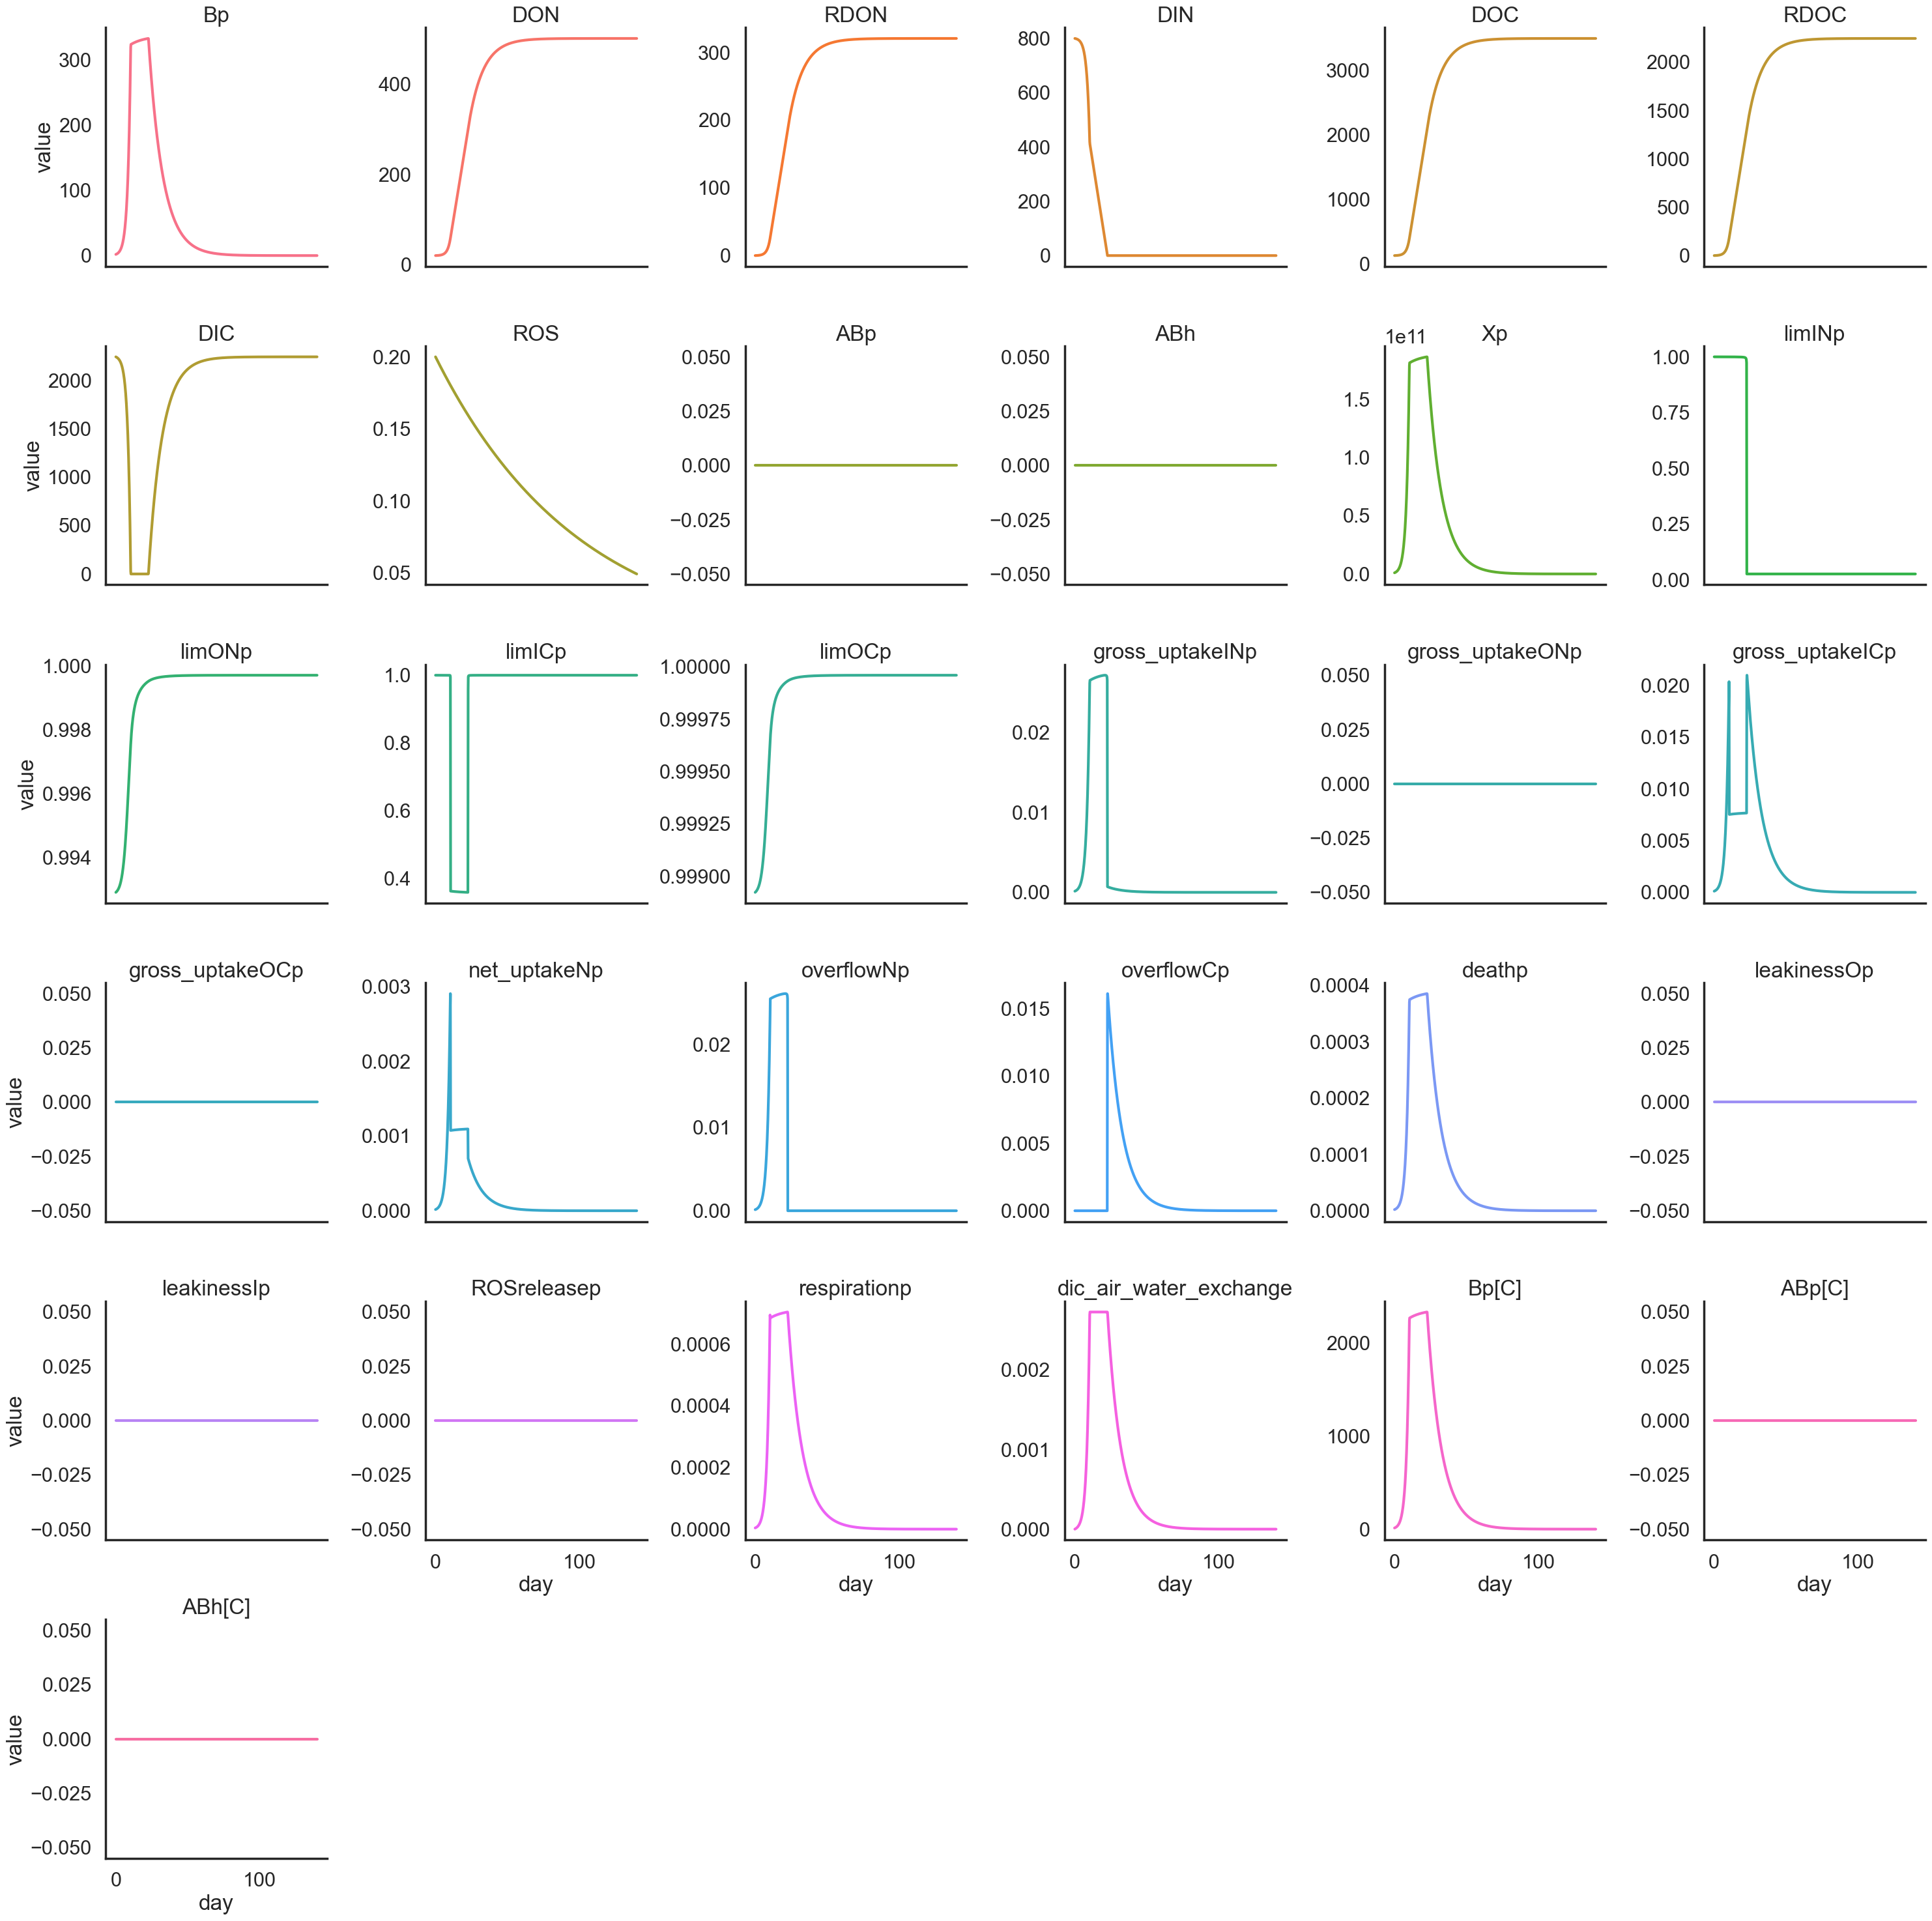

In [20]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [33]:
compute_mse(df,refdf)

,Sample,full name,Group,compare_points,MSE
0,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,1.0,155.466630
1,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,1.0,154.407353
2,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,1.0,137.951396


In [21]:
refdf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312',
       'mit9312', 'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]',
       'Bh[C]', 'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

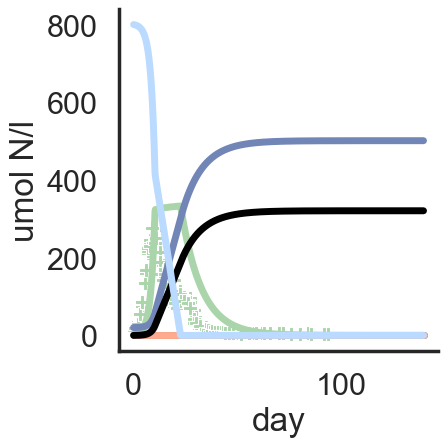

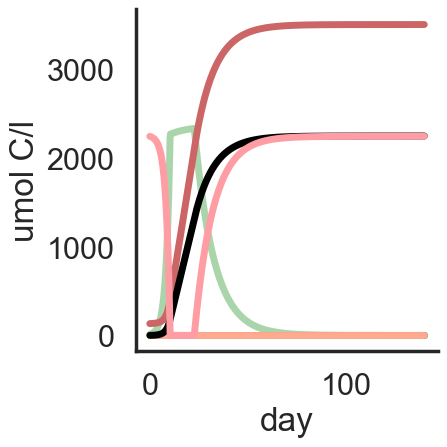

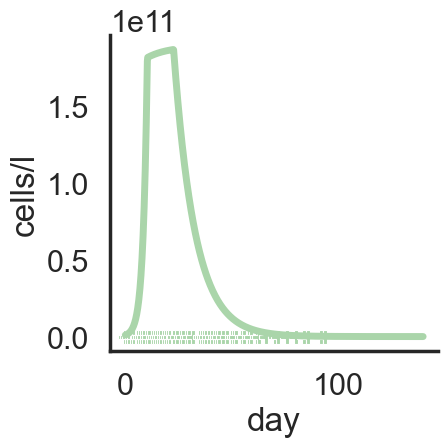

In [34]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol N/l')
sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol C/l')
#sns.scatterplot(data=refdf, x='day', y='Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[PCOLOR_light], 
           ).set(ylabel='cells/l')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
#sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')
plt.show()

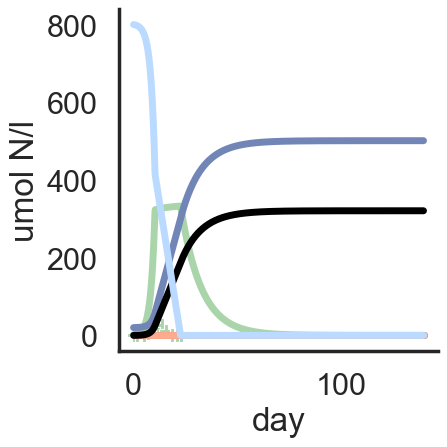

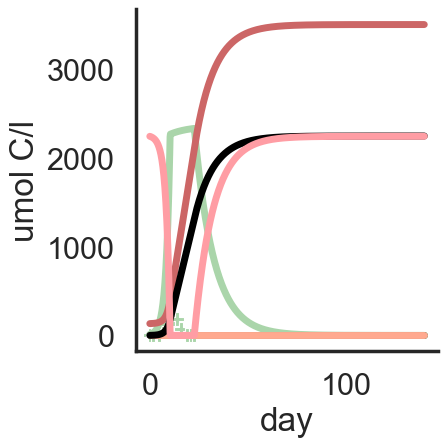

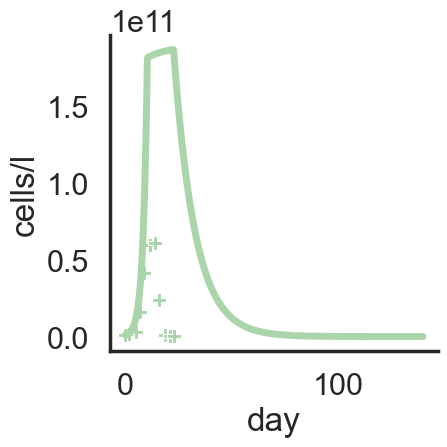

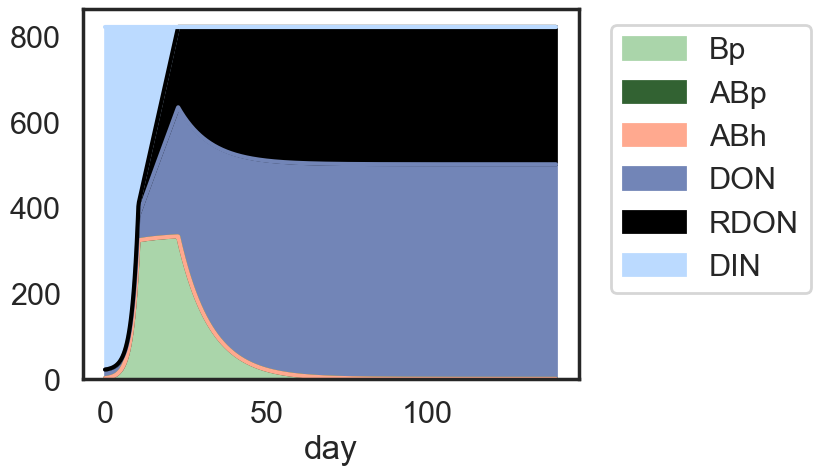

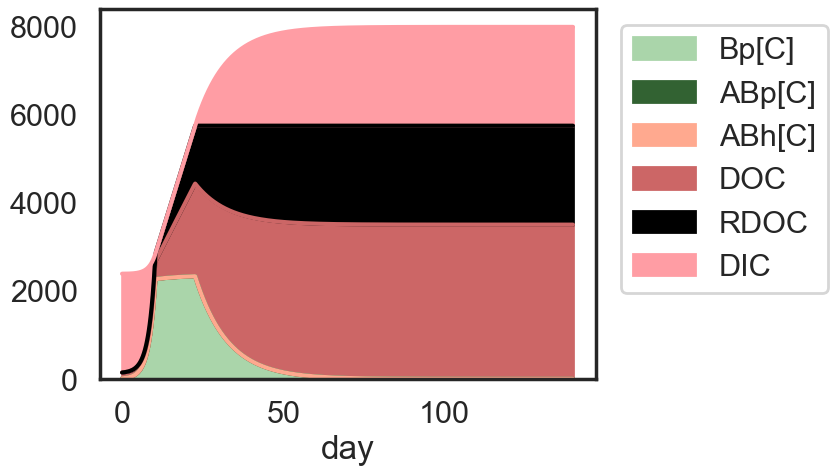

In [23]:
from matplotlib.colors import LinearSegmentedColormap
df[pnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df[pcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()


In [24]:
sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,3e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[PCOLOR_light], 
           ).set(ylabel='cells/l', yscale='log')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False,color=PCOLOR_light, marker='P')


<AxesSubplot:xlabel='day', ylabel='cells/l'>

In [25]:
len(param_vals)

In [26]:
df.min()

Bp                        2.712058e-03
DON                       2.000000e+01
RDON                      0.000000e+00
DIN                       3.759925e-03
DOC                       1.325000e+02
RDOC                      0.000000e+00
DIC                       8.013937e-02
ROS                       4.940166e-02
ABp                       0.000000e+00
ABh                       0.000000e+00
t                         0.000000e+00
day                       0.000000e+00
Xp                        1.518753e+06
limINp                    2.566314e-02
limONp                    9.929130e-01
limICp                    3.595465e-01
limOCp                    9.989238e-01
gross_uptakeINp           5.707193e-09
gross_uptakeONp           0.000000e+00
gross_uptakeICp           1.735607e-07
gross_uptakeOCp           0.000000e+00
net_uptakeNp              5.707193e-09
overflowNp                0.000000e+00
overflowCp               -8.673617e-19
deathp                    3.138956e-09
leakinessOp              